# <center>CodeClause - Data Science Internship</center>
## <center>Project - Gender and Age Detection</center>


## Project Description
### This is an Interesting data science project with python. Using just one image, you'll learn to predict the gender and age range of an individual. in this, we introduce you to computer vision and it's principles. we'll build a convolutional neural network and use models trained by tal hassner and gil levi for the adience dataset.we'll use some .pb, .pbxt, and .caffemodel files along the way.

### Click Here to download Dataset
https://www.kaggle.com/datasets/ttungl/adience-benchmark-gender-and-age-classification

In [45]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

In [46]:
data_parent = 'C:/Users/PRIYANK GOSWAMI/Desktop/Internships/CodeClause/Age_and_Gender_Detection/AdienceBenchmarkGenderAndAgeClassification'
print(os.listdir(data_parent))

['AdienceBenchmarkGenderAndAgeClassification', 'faces', 'fold_0_data.txt', 'fold_1_data.txt', 'fold_2_data.txt', 'fold_3_data.txt', 'fold_4_data.txt', '__MACOSX']


In [47]:

fold_0 = pd.read_csv(os.path.join(data_parent, 'fold_0_data.txt'), sep='\t')
fold_1 = pd.read_csv(os.path.join(data_parent, 'fold_1_data.txt'),sep='\t')
fold_2 = pd.read_csv(os.path.join(data_parent, 'fold_2_data.txt'),sep='\t')
fold_3 = pd.read_csv(os.path.join(data_parent, 'fold_3_data.txt'),sep='\t')
fold_4 = pd.read_csv(os.path.join(data_parent, 'fold_4_data.txt'),sep='\t')
total_data = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4], ignore_index=True)
total_data.head()

user_id                original_image  face_id       age gender     x  \
0  30601258@N03  10399646885_67c7d20df9_o.jpg        1  (25, 32)      f     0   
1  30601258@N03  10424815813_e94629b1ec_o.jpg        2  (25, 32)      m   301   
2  30601258@N03  10437979845_5985be4b26_o.jpg        1  (25, 32)      f  2395   
3  30601258@N03  10437979845_5985be4b26_o.jpg        3  (25, 32)      m   752   
4  30601258@N03  11816644924_075c3d8d59_o.jpg        2  (25, 32)      m   175   

      y    dx    dy  tilt_ang  fiducial_yaw_angle  fiducial_score  
0   414  1086  1383      -115                  30              17  
1   105   640   641         0                   0              94  
2   876   771   771       175                 -30              74  
3  1255   484   485       180                   0              47  
4    80   769   768       -75                   0              34

In [48]:
print('[+] length of the file:', len(total_data))
print('[+] unique values of Age:')
print(total_data.age.unique())
print('===================================================')
print('[+] Number of None Values in Age:')
print((total_data.age == 'None').sum())
print('[+] unique values of Gender:')
print(total_data.gender.unique())
print('===================================================')
print('[+] Number of nan values in Gender:')
print(total_data.gender.isna().sum())

[+] length of the file: 19370
[+] unique values of Age:
['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '55' '58' '22' '13' '45'
 '36' '23' '(38, 42)' '(8, 23)' '(27, 32)' '57' '56' '2' '29' '34' '42'
 '46' '32']
[+] Number of None Values in Age:
748
[+] unique values of Gender:
['f' 'm' nan 'u']
[+] Number of nan values in Gender:
779


# Gender chart

<AxesSubplot: ylabel='gender'>

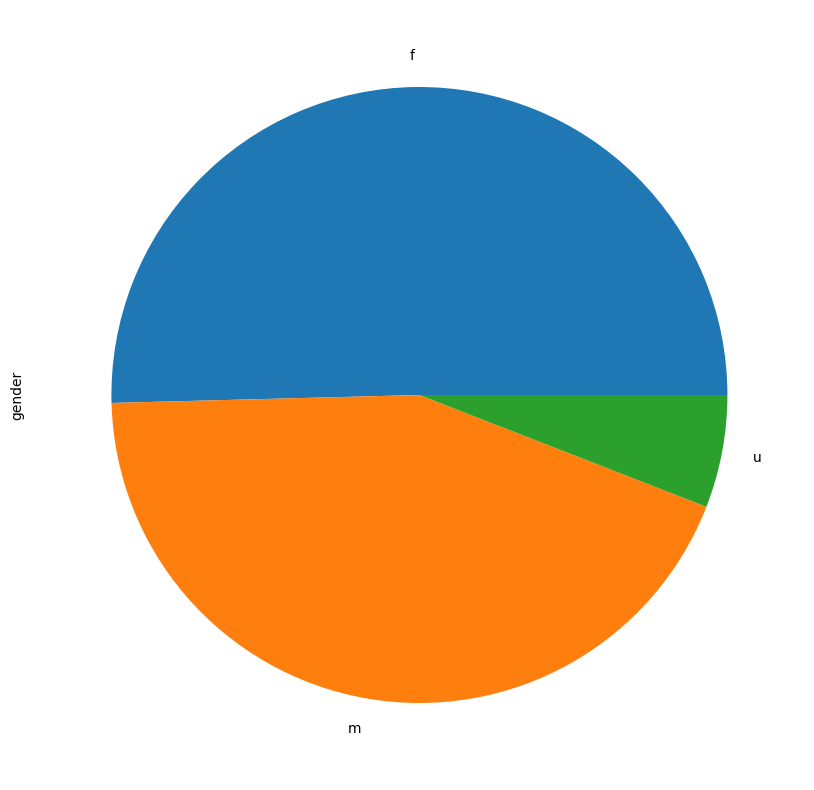

In [49]:
total_data.groupby('gender')['gender'].count().plot.pie(figsize=(10, 10))

# Age chart

<AxesSubplot: ylabel='age'>

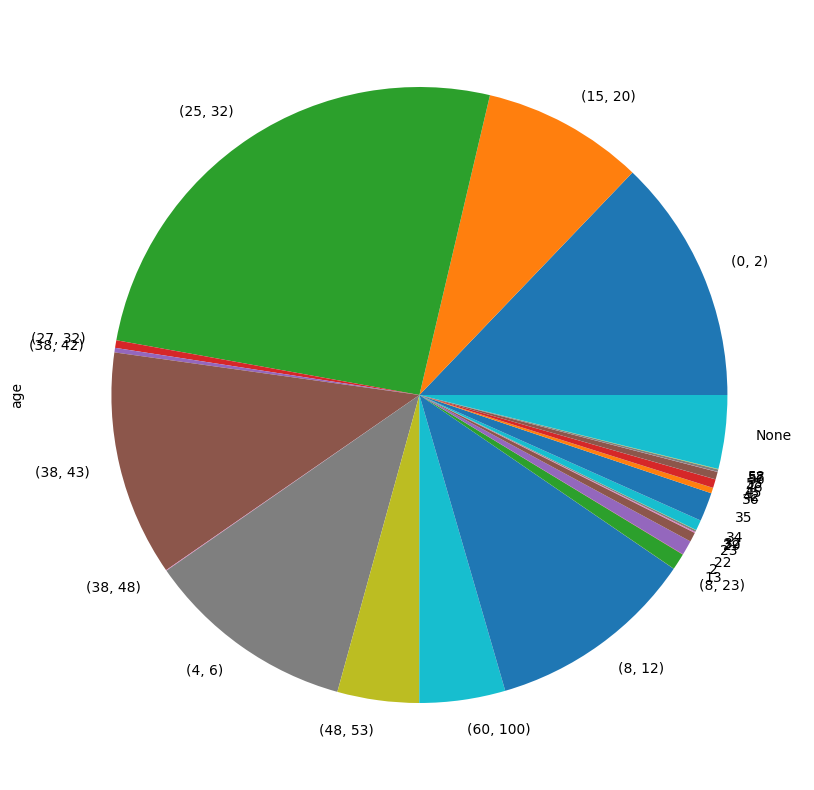

In [50]:
total_data.groupby('age')['age'].count().plot.pie(figsize=(10, 10))

[+] Image path: C:/Users/PRIYANK GOSWAMI/Desktop/Internships/CodeClause/Age_and_Gender_Detection/AdienceBenchmarkGenderAndAgeClassification\faces\30601258@N03\coarse_tilt_aligned_face.1.10399863183_a04f4c26a1_o.jpg
[+] Image shape: (600, 600, 3)
[!] Age: (25, 32) Gender: f


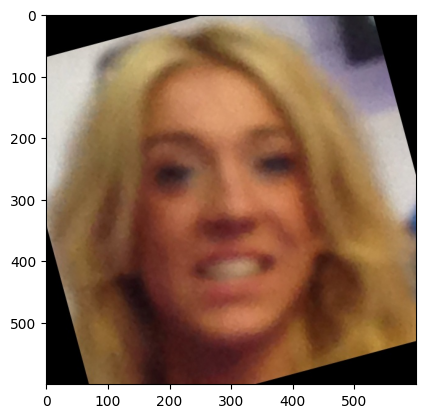

In [7]:
sample_num = 200
im_name = total_data.iloc[sample_num].original_image
im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
print('[+] Image path:', im_path)
image = cv2.imread(im_path)
print('[+] Image shape:', image.shape)
print('[!] Age:', total_data.iloc[sample_num].age, 'Gender:', total_data.iloc[sample_num].gender)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

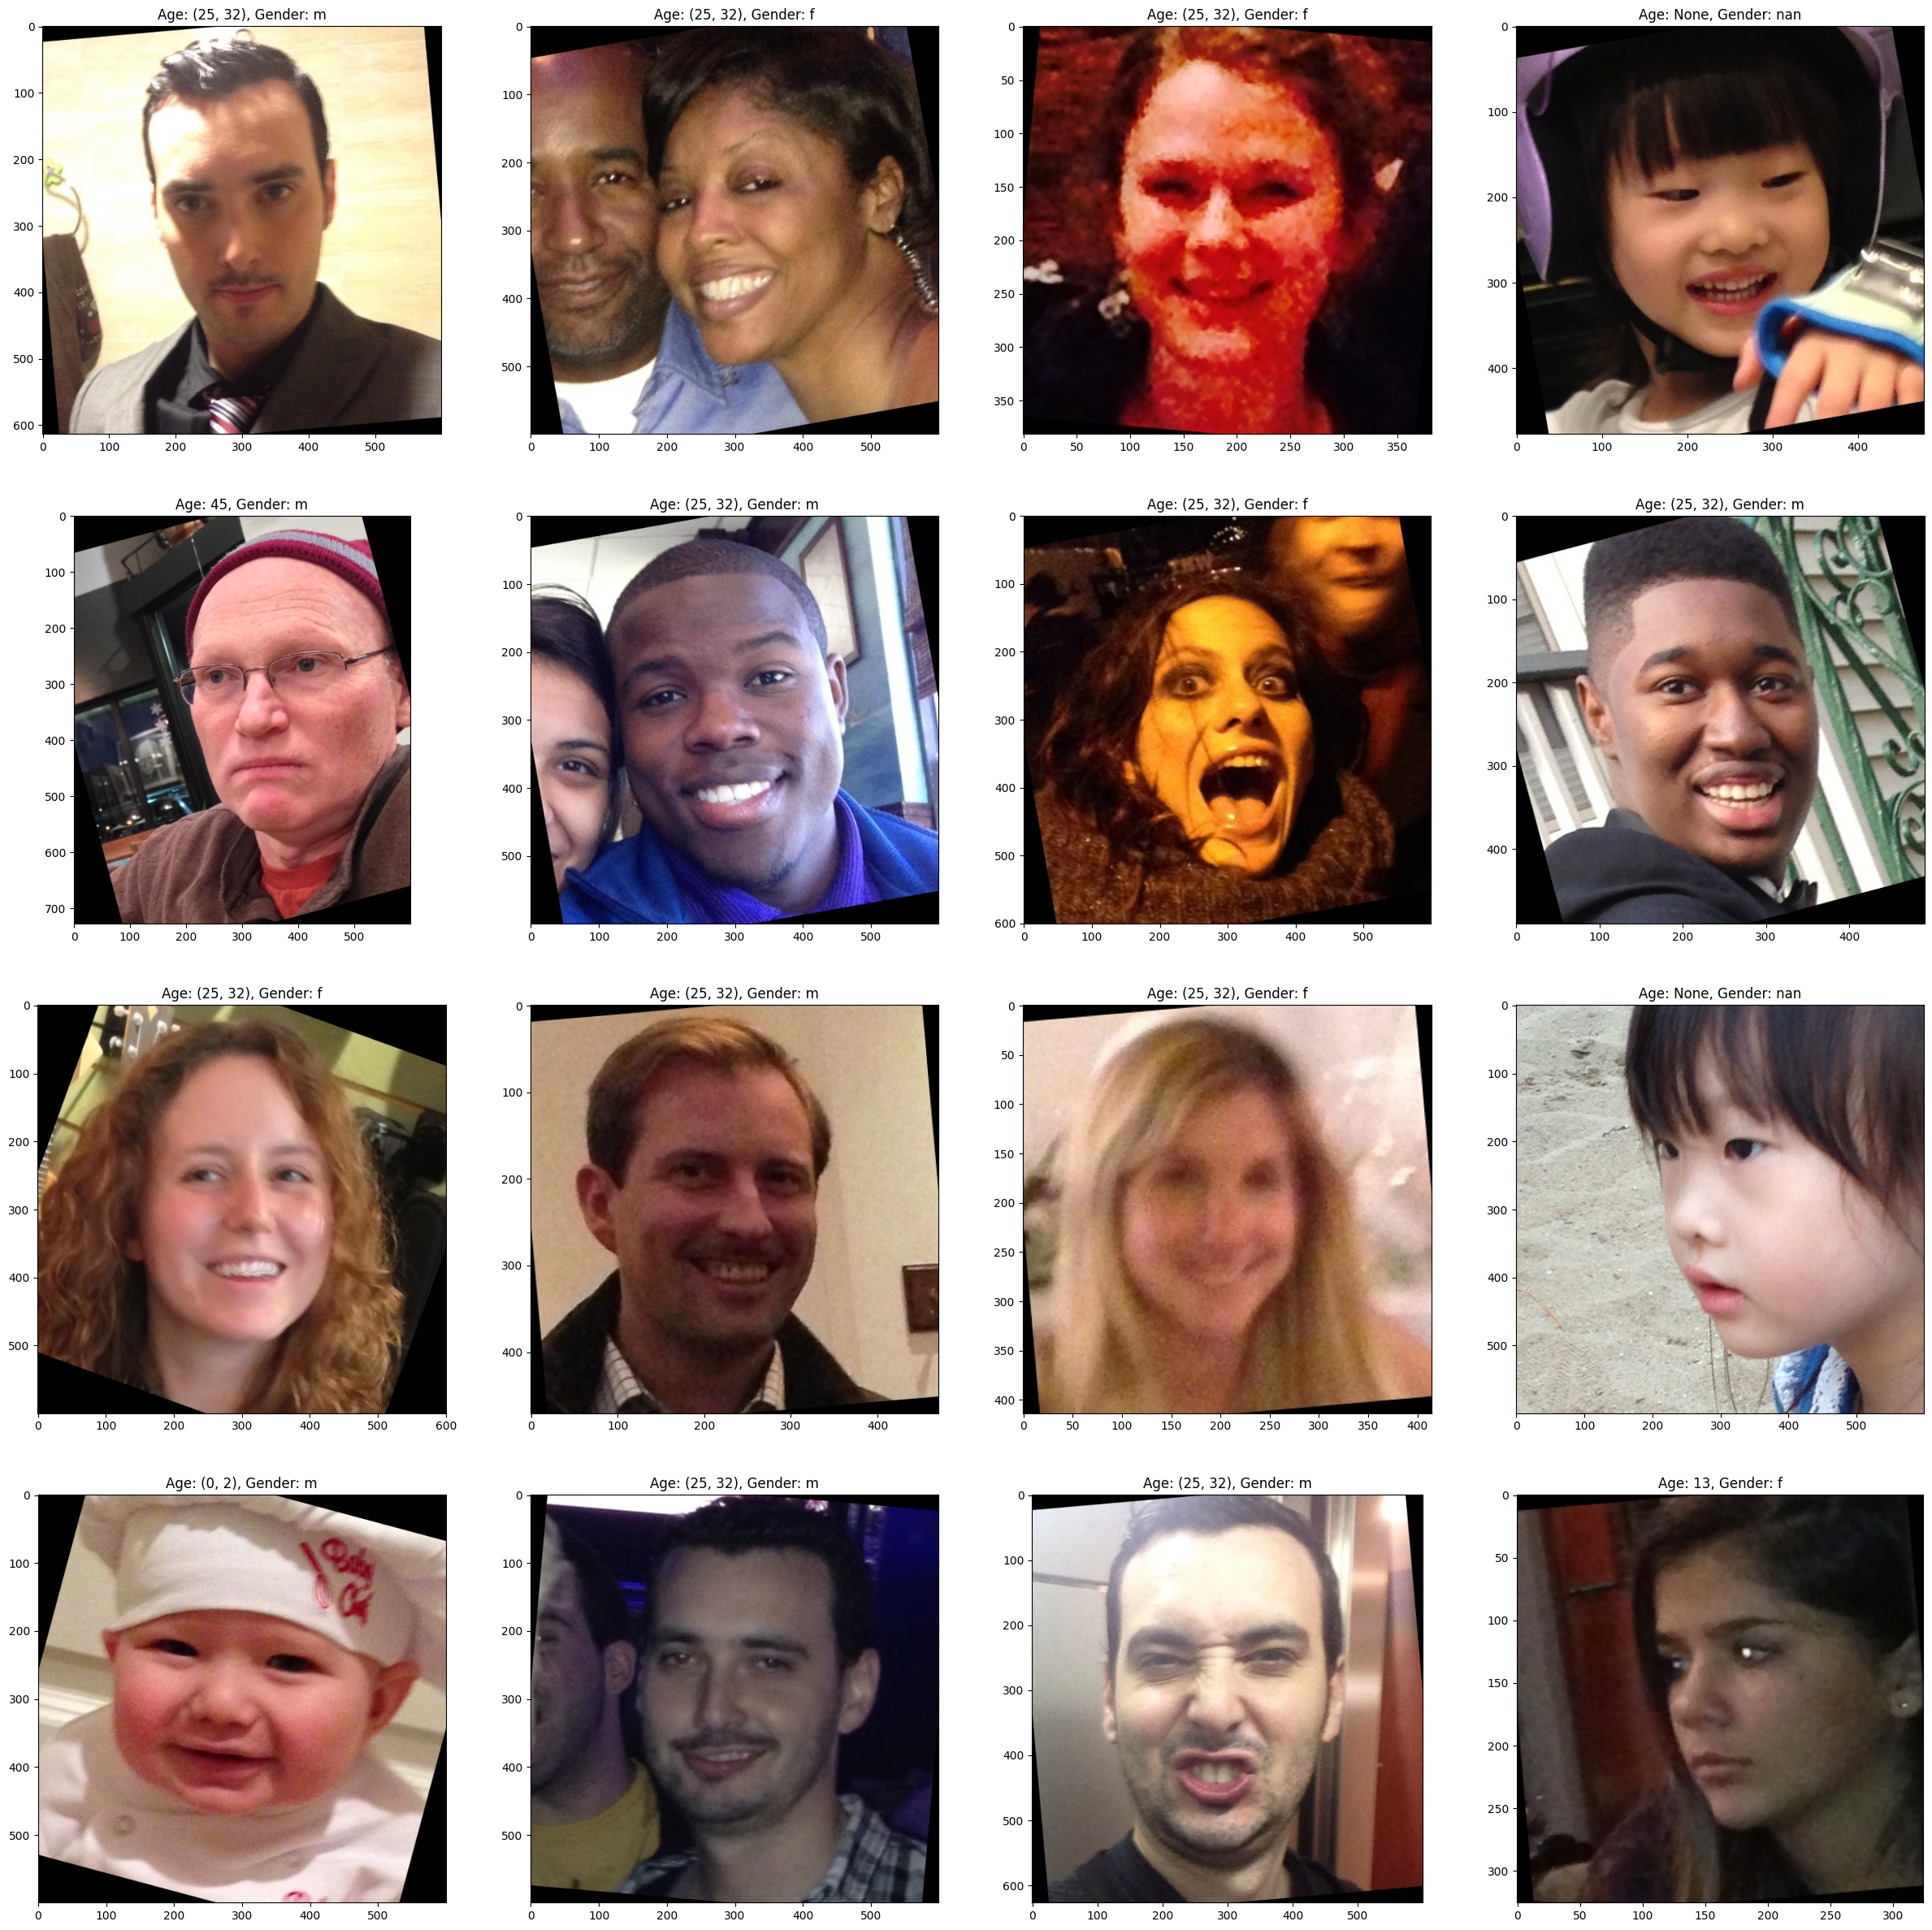

In [8]:
images = []
for _ in range(16):
    sample_num = random.randint(0, len(total_data))
    im_name = total_data.iloc[sample_num].original_image
    im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
    image = cv2.imread(im_path)
    age = total_data.iloc[sample_num].age
    gender = total_data.iloc[sample_num].gender
    n_col = 4
    n_rows = 4
    images.append((image, age, gender))
    
fig, axs = plt.subplots(ncols=n_col, nrows=n_rows, figsize=(30,30))
count = 0
for i in range(n_rows):
      for j in range(n_col):
        axs[i][j].imshow(cv2.cvtColor(images[count][0], cv2.COLOR_BGR2RGB))
        axs[i][j].set_title(f'Age: {images[count][1]}, Gender: {images[count][2]}')
        count+=1
plt.show()

In [9]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping}

drop_labels = []
for idx, each in enumerate(total_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        total_data.age.loc[idx] = age_mapping_dict[each]
total_data = total_data.drop(labels=drop_labels, axis=0) #droped None values
total_data.age.value_counts(dropna=False)

c:\Users\PRIYANK GOSWAMI\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [10]:
total_data = total_data.dropna()
total_data['full_path'] = total_data.apply(lambda x: os.path.join(data_parent, 'faces', str(x.user_id), 'coarse_tilt_aligned_face.' + str(x.face_id) + '.' + x.original_image), axis=1)
total_data.age.unique(), len(total_data.age.unique()), total_data.gender.unique()

(array(['25-32', '38-43', '4-6', '60+', '15-20', '48-53', '8-13', '0-2'],
       dtype=object),
 8,
 array(['f', 'm', 'u'], dtype=object))

# change age and gender mapping 

In [11]:

gender_map = {'f':0, 
             'm':1,
             'u':2}
age_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}
total_data.gender = total_data.gender.replace(gender_map)
total_data.age=total_data.age.replace(age_map)

In [12]:
gender_labels = total_data.gender.values.tolist()
age_labels= total_data.age.values.tolist()
train_paths = total_data.full_path.values.tolist()
len(gender_labels), gender_labels[0],len(age_labels),age_labels[0], train_paths[0]

(18551,
 0,
 18551,
 4,
 'C:/Users/PRIYANK GOSWAMI/Desktop/Internships/CodeClause/Age_and_Gender_Detection/AdienceBenchmarkGenderAndAgeClassification\\faces\\30601258@N03\\coarse_tilt_aligned_face.1.10399646885_67c7d20df9_o.jpg')

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
shuffle_list = list(zip(train_paths, gender_labels,age_labels))
shuffle_list = random.sample(shuffle_list, len(train_paths))
train_paths, gender_labels,age_labels = zip(*shuffle_list)
age_labels = np.array(list(age_labels)).reshape((-1, 1))
enc= OneHotEncoder()
age_labels = enc.fit_transform(age_labels).toarray() 

In [15]:
train_split = 0.75
train_sample = int(train_split * len(total_data))

train_data = train_paths[:train_sample]
validation_data = train_paths[train_sample:]

train_labels_gender = gender_labels[:train_sample]
validation_labels_gender = gender_labels[train_sample:]

train_labels_age=age_labels[:train_sample]
validation_labels_age=age_labels[train_sample:]
print("train data count:")
len(train_data), len(train_labels_gender), len(train_labels_age)
# print("validation data count:")
# len(validation_data), len(validation_labels)

train data count:


(13913, 13913, 13913)

In [16]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import multiprocessing

In [17]:

train_dataset = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_age)))
validation_dataset = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_age)))

In [18]:

for path, target1 in train_dataset.take(1):
    print(path, target1)

tf.Tensor(b'C:/Users/PRIYANK GOSWAMI/Desktop/Internships/CodeClause/Age_and_Gender_Detection/AdienceBenchmarkGenderAndAgeClassification\\faces\\8034587@N06\\coarse_tilt_aligned_face.700.11299109116_8b086f884f_o.jpg', shape=(), dtype=string) tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0.], shape=(8,), dtype=float64)


In [19]:


def preprocess_func(path, label_age):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_age

In [20]:
import multiprocessing

In [21]:
train_batches = train_dataset.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(512).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches = validation_dataset.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(512).prefetch(tf.data.experimental.AUTOTUNE)

(512, 128, 128, 3) (512, 8)
tf.Tensor([0. 0. 1. 0. 0. 0. 0. 0.], shape=(8,), dtype=float64)


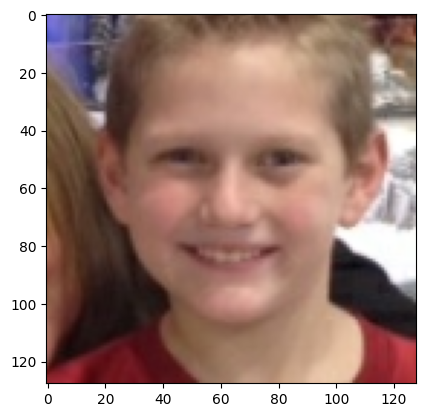

In [22]:

for image, target1 in train_batches.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 3, padding='same', strides=2, activation='relu', input_shape=(128, 128, 3)),

    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D()
    
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),

    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation = 'softmax')
])

model.compile(optimizer='adam', loss= tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                    

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Age classification (training with results)

In [25]:
 history = model.fit(train_batches, epochs=25, validation_data = validation_batches)

Epoch 1/25
28/28 [==============================] - 115s 4s/step - loss: 1.8783 - accuracy: 0.3026 - val_loss: 1.7265 - val_accuracy: 0.3696
Epoch 2/25
28/28 [==============================] - 126s 4s/step - loss: 1.6191 - accuracy: 0.4047 - val_loss: 1.5716 - val_accuracy: 0.4125
Epoch 3/25
28/28 [==============================] - 118s 4s/step - loss: 1.4609 - accuracy: 0.4602 - val_loss: 1.4721 - val_accuracy: 0.4504
Epoch 4/25
28/28 [==============================] - 117s 4s/step - loss: 1.3359 - accuracy: 0.5069 - val_loss: 1.4294 - val_accuracy: 0.4692
Epoch 5/25
28/28 [==============================] - 112s 4s/step - loss: 1.2422 - accuracy: 0.5460 - val_loss: 1.4155 - val_accuracy: 0.4774
Epoch 6/25
28/28 [==============================] - 111s 4s/step - loss: 1.1674 - accuracy: 0.5768 - val_loss: 1.3302 - val_accuracy: 0.5097
Epoch 7/25
28/28 [==============================] - 123s 4s/step - loss: 1.0826 - accuracy: 0.6075 - val_loss: 1.3131 - val_accuracy: 0.5175
Epoch 8/25
28

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

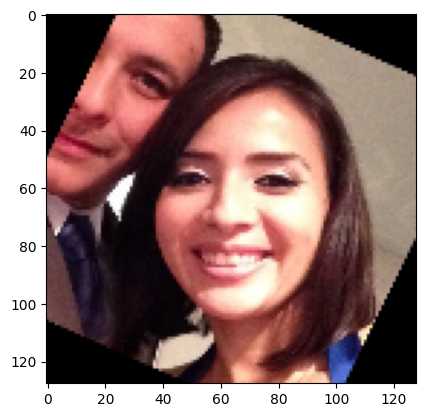

In [27]:
image_path = validation_data[7]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()

In [28]:
image = np.expand_dims(image, 0)
prediction = model.predict(image)

1/1 [==============================] - 1s 1s/step


In [29]:
index = np.argmax(prediction)
decoding = {0:'0-2', 1:'4-6', 2:'8-13',3:'15-20',4:'25-32',5:'38-43',6:'48-53',7:'60+'}

print('[+] prediction is :', decoding[index]) 
# print(validation_data[7].age_labels)

[+] prediction is : 15-20


# gender classification with results

In [30]:
train_dataset2 = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_gender)))
validation_dataset2 = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_gender)))

In [31]:
for path, target1 in train_dataset2.take(1):
    print(path, target1)

tf.Tensor(b'C:/Users/PRIYANK GOSWAMI/Desktop/Internships/CodeClause/Age_and_Gender_Detection/AdienceBenchmarkGenderAndAgeClassification\\faces\\8034587@N06\\coarse_tilt_aligned_face.700.11299109116_8b086f884f_o.jpg', shape=(), dtype=string) tf.Tensor(2, shape=(), dtype=int32)


In [32]:
def preprocess_func(path, label_gender):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_gender

In [33]:
train_batches2 = train_dataset2.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(512).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches2 = validation_dataset2.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(512).prefetch(tf.data.experimental.AUTOTUNE)

(512, 128, 128, 3) (512, 8)
tf.Tensor([0. 0. 1. 0. 0. 0. 0. 0.], shape=(8,), dtype=float64)


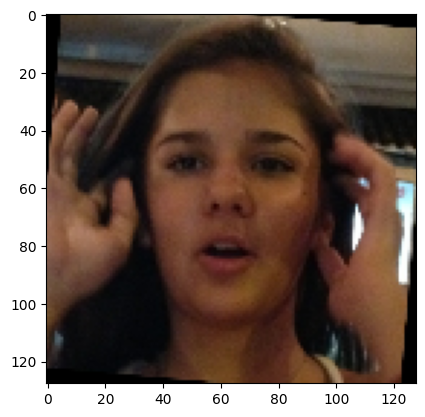

In [34]:
for image, target1 in train_batches.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 3, padding='same', strides=2, activation='relu', input_shape=(128, 128, 3)),

    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),

    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.4),
    
     tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
      tf.keras.layers.Conv2D(258, 3, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.5), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'softmax')
])

model.compile(optimizer='adam', loss= tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 8)         224       
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                      

In [36]:
 history = model.fit(train_batches2, epochs=3, validation_data = validation_batches2)

Epoch 1/3


c:\Users\PRIYANK GOSWAMI\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


28/28 [==============================] - 246s 9s/step - loss: 0.0000e+00 - accuracy: 0.4361 - val_loss: 0.0000e+00 - val_accuracy: 0.4424
Epoch 2/3
28/28 [==============================] - 255s 9s/step - loss: 0.0000e+00 - accuracy: 0.4361 - val_loss: 0.0000e+00 - val_accuracy: 0.4424
Epoch 3/3
28/28 [==============================] - 253s 9s/step - loss: 0.0000e+00 - accuracy: 0.4361 - val_loss: 0.0000e+00 - val_accuracy: 0.4424


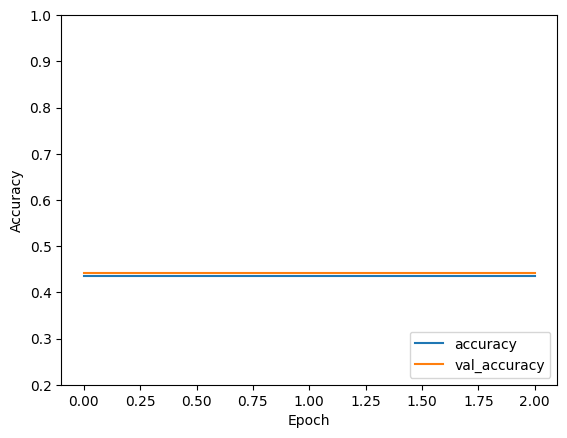

In [37]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

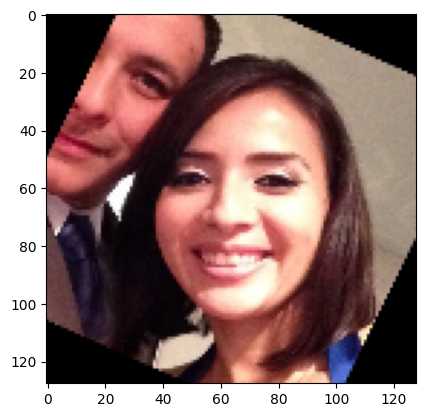

In [38]:
image_path = validation_data[7]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()

In [39]:
image = np.expand_dims(image, 0)
prediction = model.predict(image)

1/1 [==============================] - 0s 360ms/step


In [40]:
index = np.argmax(prediction)
decoding = {0:'f', 1:'m', 2:'u'}

print('[+] prediction is :', decoding[index]) 


[+] prediction is : f
